<a href="https://colab.research.google.com/github/jordantab/BA305/blob/main/Presentation_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import sklearn
import folium
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/Shareddrives/BA305/

/content/gdrive/Shareddrives/BA305


In [ ]:
from google.colab import files
images_dir = '/content/gdrive/Shareddrives/BA305/Visualizations' #to save visualizations

## Data Cleaning

In [ ]:
# load data
df = pd.read_csv('training.csv')

In [ ]:
#replace encoding with real values

df['Q2'] = df['Q2'].replace({1: 'Male',
                             2: 'Female'})

df['Q3'] = df['Q3'].replace({1: 'Married',
                             2: 'Divorced',
                             3: 'Widowed',
                             4: 'Never married'})

df['Q4'] = df['Q4'].replace({1: 'No formal education',
                             2: 'Some primary education',
                             3: 'Completed primary education',
                             4: 'Post primary technical training',
                             5: 'Some secondary education',
                             6: 'University or higher education',
                             7: 'Don\'t know',
                             8: np.nan})

df['Q5'] = df['Q5'].replace({1: 'Personally own',
                             2: 'Co-own',
                             3: 'Household member owns',
                             4: 'Rented',
                             5: 'Don\'t own or rent',
                             6: 'Don\'t know'})

df['Q6'] = df['Q6'].replace({2: 0})

df['Q7'] = df['Q7'].replace({2: 0})

df['Q9'] = df['Q9'].replace({-1: 'No salary/wage',
                             1: 'Government',
                             2: 'Private company/business',
                             3: 'Own business',
                             4: 'Small scale farmer',
                             5: 'Commercial farmer',
                             6: 'Work for individual/household',
                             7: 'Other'})

df['Q10'] = df['Q10'].replace({-1: 'Do not sell things',
                               1: 'Crops/produce',
                               2: 'Livestock products',
                               3: 'Livestock',
                               4: 'Fish',
                               5: 'Resell agricultural products',
                               6: 'Resell non-agricultural products',
                               7: 'Hand-made products',
                               8: 'Collected products',
                               9: 'Processed products',
                               10: 'Other'})

df['Q11'] = df['Q11'].replace({-1: 'Do not provide service',
                               1: 'Personal services',
                               2: 'Telecommunications/IT',
                               3: 'Financial services',
                               4: 'Transport',
                               5: 'Hospitality',
                               6: 'Information',
                               7: 'Technical',
                               8: 'Educational/child care',
                               9: 'Health services',
                               10: 'Legal services',
                               11: 'Security',
                               12: 'Other'})

df['Q12'] = df['Q12'].replace({2: 0})

df['Q13'] = df['Q13'].replace({-1: np.nan,
                               1: 'Yesterday/today',
                               2: 'Past 7 days',
                               3: 'Past 30 days',
                               4: 'Past 90 days',
                               5: 'More than 90 days, less than 6 months',
                               6: '6 or more months ago'})

df['Q14'] = df['Q14'].replace({2: 0})

df['Q15'] = df['Q15'].replace({-1: np.nan,
                               1: 'Yesterday/today',
                               2: 'Past 7 days',
                               3: 'Past 30 days',
                               4: 'Past 90 days',
                               5: 'More than 90 days, less than 6 months',
                               6: '6 or more months ago'})

df['Q16'] = df['Q16'].replace({-1: np.nan,
                               1: 'Never',
                               2: 'Daily',
                               3: 'Weekly',
                               4: 'Monthly',
                               5: 'Less often than monthly'})

df['Q17'] = df['Q17'].replace({-1: np.nan,
                               1: 'Never',
                               2: 'Daily',
                               3: 'Weekly',
                               4: 'Monthly',
                               5: 'Less often than monthly'})

df['Q18'] = df['Q18'].replace({1: 'Read and write',
                               2: 'Read only',
                               3: 'Write only',
                               4: 'Neither read nor write',
                               5: 'Refused to read'})

df['Q19'] = df['Q19'].replace({1: 'Read and write',
                               2: 'Read only',
                               3: 'Write only',
                               4: 'Neither read nor write',
                               5: 'Refused to read'})

df['mobile_money_classification'] = df['mobile_money_classification'].replace({0: 0,
                                                                               1: 0,
                                                                               2: 1,
                                                                               3: 1})

In [ ]:
#replace column names
df.columns = ['id', 'age', 'gender', 'marital_status', 'education', 'house_land_ownership',
              'other_land_ownership','mobile_ownership', 'salary_income', 'product_income',
              'service_income', 'temp_income', 'rental_income', 'interest_income',
              'pension_income', 'welfare_income', 'others_income', 'no_income', 'other_source_income',
              'salaried_worker_employer', 'product_income_product', 'service_income_service',
              'money_sent_international', 'last_sent_money', 'money_received_international',
              'last_received_money', 'mm_goods_frequency','mm_bills_frequency', 'kiswahili_literacy',
              'english_literacy', 'latitude', 'longitude', 'mm_use', 'saving', 'borrowing', 'insurance', 'target']

In [ ]:
#drop columns that contain information that would not be known without knowing the target value
to_drop = ['id', 'mm_goods_frequency','mm_bills_frequency', 'mm_use', 'saving', 'borrowing', 'insurance',
           'money_sent_international', 'last_sent_money', 'money_received_international', 'last_received_money']

df = df.drop(columns = to_drop)

In [ ]:
#merge income source
conditions = [(df['salary_income']=='Yes'),
              (df['product_income']=='Yes'),
              (df['service_income']=='Yes'),
              (df['temp_income']=='Yes'),
              (df['rental_income']=='Yes'),
              (df['interest_income']=='Yes'),
              (df['pension_income']=='Yes'),
              (df['welfare_income']=='Yes'),
              (df['others_income']=='Yes'),
              (df['no_income']=='Yes'),
              (df['other_source_income']=='Yes')]

values = ['salary_income', 'product_income', 'service_income', 'temp_income',
          'rental_income', 'interest_income', 'pension_income',
          'welfare_income', 'others_income', 'no_income', 'other_source_income']

df['income_source'] = np.select(conditions, values)

df['income_source'] = df['income_source'].apply(lambda row: row.split('_')[0])

In [ ]:
#examine dataframe
df.head()

,age,gender,marital_status,education,house_land_ownership,other_land_ownership,mobile_ownership,salary_income,product_income,service_income,...,other_source_income,salaried_worker_employer,product_income_product,service_income_service,kiswahili_literacy,english_literacy,latitude,longitude,target,income_source
0,98,Female,Widowed,No formal education,Personally own,0,0,0,0,0,...,0,No salary/wage,Do not sell things,Do not provide service,Neither read nor write,Neither read nor write,-4.460442,29.811396,0,0
1,40,Male,Married,Completed primary education,Don't own or rent,1,1,1,0,0,...,0,Government,Do not sell things,Do not provide service,Read and write,Neither read nor write,-6.176438,39.244871,1,0
2,18,Female,Never married,University or higher education,Household member owns,0,1,0,0,0,...,0,No salary/wage,Do not sell things,Do not provide service,Read and write,Read and write,-6.825702,37.652798,1,0
3,50,Male,Married,Completed primary education,Personally own,1,1,0,0,0,...,0,No salary/wage,Do not sell things,Do not provide service,Read and write,Neither read nor write,-3.372049,35.808307,1,0
4,34,Male,Married,No formal education,Personally own,0,1,0,1,0,...,0,No salary/wage,Crops/produce,Do not provide service,Read and write,Neither read nor write,-7.179645,31.039095,1,0



---


## Feature Engineering

In [ ]:
!pip install haversine
import haversine as hs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import data with latitude and longitude of atms, banks, microfinance institutions, and mobile money agents
atm = pd.read_csv('atm.csv', usecols = ['latitude', 'longitude'])
bank = pd.read_csv('bank.csv', usecols = ['latitude', 'longitude'])
microf = pd.read_csv('microfinance.csv', usecols = ['latitude', 'longitude'])
agent = pd.read_csv('mm_agents.csv', usecols = ['latitude', 'longitude'], encoding_errors='ignore')

In [ ]:
#add empty columns to dataframe to hold distance to
#closest atm, closest bank, closest microfinance institution
df['closest_atm'] = ''
df['closest_bank'] = ''
df['closest_mf'] = ''

In [ ]:
def find_closest(user, df):
  distances = []

  for i in df.index:
    location = (df.iloc[i]['latitude'], df.iloc[i]['longitude'])
    distances.append(hs.haversine(user, location, unit = 'mi'))

  return np.min(distances)

In [ ]:
#for each user, compute the distance to the closest atm, closest bank, closest microfinance institution, and closest agent
#this will take a while
for i in df.index:
  user = (df.iloc[i, 23], df.iloc[i, 24]) #get user location (column 23 = lat, column 24 = lon)
  df.iloc[i, 27] = find_closest(user, atm) #find distance of closest atm
  df.iloc[i, 28] = find_closest(user, bank) #find distance of closest bank
  df.iloc[i, 29] = find_closest(user, microf) #find distance of closest microfinance institution

In [ ]:
#save to csv
df_processed = df.to_csv('processed_df.csv', index = False)

---


## Exploration

In [ ]:
#set color palette
colors = ['#8870a0', '#d1c8da', '#ff9e44', '#572d7e', '#0e0918', '#ff9e44', '#ff4093', '#5aa5da', '#c06ee2']
customPalette = sns.set_palette(sns.color_palette(colors))

In [ ]:
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap
from collections import defaultdict

In [ ]:
#import data with latitude and longitude of atms, banks, microfinance institutions, and mobile money agents
atm = pd.read_csv('atm.csv', usecols = ['latitude', 'longitude'])
bank = pd.read_csv('bank.csv', usecols = ['latitude', 'longitude'])
microf = pd.read_csv('microfinance.csv', usecols = ['latitude', 'longitude'])

In [ ]:
df = pd.read_csv('processed_df.csv')

In [ ]:
mobile_pivot = pd.pivot_table(data = df, values = 'age', columns = 'target', index = 'mobile_ownership',
                              aggfunc = 'count', margins = True).drop('All', axis = 1)

mobile_pivot[0] = (mobile_pivot[0]/mobile_pivot[0]['All']) * 100
mobile_pivot[1] = (mobile_pivot[1]/mobile_pivot[1]['All']) * 100

mobile_pivot.index = ['Do not own mobile', 'Own mobile', 'All']
mobile_pivot.columns = ['Non-user', 'User']

mobile_pivot[:-1]

,Non-user,User
Do not own mobile,69.848293,15.597964
Own mobile,30.151707,84.402036


In [ ]:
map = folium.Map(location = [-6.956418,35.397947], tiles = 'OpenStreetMap', zoom_start = 6)
people_coordinates = df[df['target'] == 1].apply(lambda row: [row['latitude'], row['longitude']], axis = 1).values
HeatMap(people_coordinates, min_opacity=0.4).add_to(map) #create heatmap of survey respondents
atm_coordinates = atm.apply(lambda row: [row['latitude'], row['longitude']], axis = 1).values
[folium.CircleMarker(location = val, radius = 1, color = 'black').add_to(map) for val in atm_coordinates]

map

In [ ]:
df.shape

(7094, 30)

In [ ]:
#class imbalance
df['target'].value_counts(normalize = True)

1    0.553989
0    0.446011
Name: target, dtype: float64

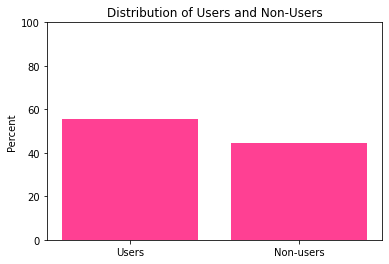

<Figure size 432x288 with 0 Axes>

In [ ]:
#baseline model would have 55% accuracy

users = df[df['target'] == 1]
non_users = df[df['target'] == 0]

x = ['Users', 'Non-users']
y = [(df[df['target'] == 1].shape[0]/df.shape[0])*100, (df[df['target'] == 0].shape[0]/df.shape[0])*100]
plt.bar(x, y, color = '#ff4093')
plt.ylabel('Percent')
plt.title('Distribution of Users and Non-Users')
plt.ylim(0, 100)
plt.show()

plt.savefig(f'{images_dir}/1.png')

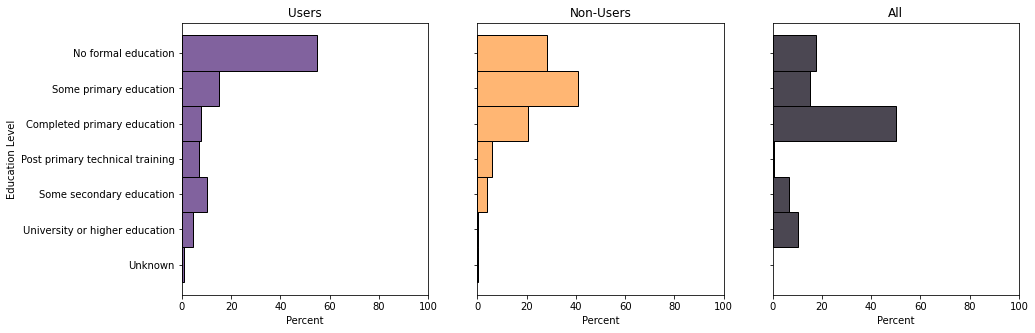

In [ ]:
df['education'] = pd.Categorical(df['education'], ['No formal education', 'Some primary education', 'Completed primary education',
                                                   'Post primary technical training', 'Some secondary education',
                                                   'University or higher education', 'Unknown'])

fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 3, sharey = True)

sns.histplot(y = users['education'], stat = 'percent', ax = ax[0], color = '#572d7e')
sns.histplot(y = non_users['education'], stat = 'percent', ax = ax[1], color = '#ff9e44')
sns.histplot(y = df['education'], stat = 'percent', ax = ax[2], color = '#0e0918')

ax[0].set_title('Users')
ax[1].set_title('Non-Users')
ax[2].set_title('All')
ax[0].set_ylabel('Education Level')

for a in ax:
  a.set_xlim(0,100)

plt.show()

In [ ]:
#income source
df['income_source'] = df['income_source'].apply(lambda row: row.split('_')[0])

fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 3, sharey = True)

sns.histplot(y = users['income_source'], stat = 'percent', ax = ax[0], color = '#572d7e')
sns.histplot(y = non_users['income_source'], stat = 'percent', ax = ax[1], color = '#ff9e44')
sns.histplot(y = df['income_source'], stat = 'percent', ax = ax[2], color = '#0e0918')

ax[0].set_title('Users')
ax[1].set_title('Non-Users')
ax[2].set_title('All')
ax[0].set_ylabel('Income Source')

for a in ax:
  a.set_xlim(0,100)

plt.show()
plt.savefig(f'{images_dir}/2.png')

AttributeError: ignored

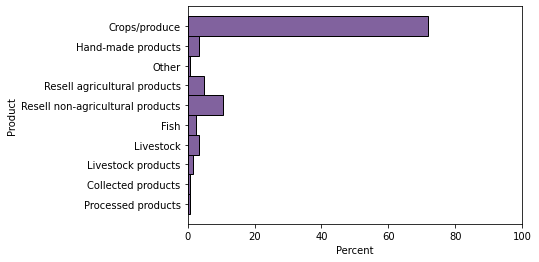

<Figure size 432x288 with 0 Axes>

In [ ]:
#products sold
sns.histplot(y = users[users['product_income_product'] != 'Do not sell things']['product_income_product'],
             stat = 'percent', color = '#572d7e')
plt.xlim(0,100)
plt.ylabel('Product')
plt.show()
plt.savefig(f'{images_dir}/3.png')

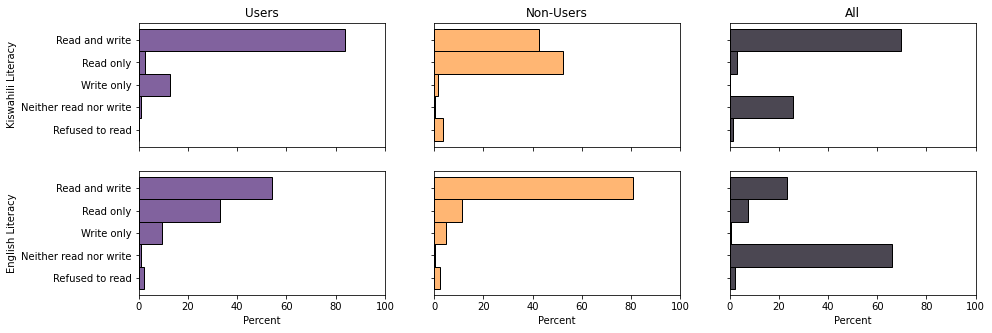

<Figure size 432x288 with 0 Axes>

In [ ]:
#language fluency
df['kiswahili_literacy'] = pd.Categorical(df['kiswahili_literacy'], ['Read and write', 'Read only', 'Write only',
                                                                     'Neither read nor write', 'Refused to read'])

df['english_literacy'] = pd.Categorical(df['english_literacy'], ['Read and write', 'Read only', 'Write only',
                                                                     'Neither read nor write', 'Refused to read'])

fig, ax = plt.subplots(figsize = (15, 5), nrows = 2, ncols = 3, sharex = True, sharey = True)

sns.histplot(y = users['kiswahili_literacy'], stat = 'percent', ax = ax[0][0], color = '#572d7e')
sns.histplot(y = non_users['kiswahili_literacy'], stat = 'percent', ax = ax[0][1], color = '#ff9e44')
sns.histplot(y = df['kiswahili_literacy'], stat = 'percent', ax = ax[0][2], color = '#0e0918')
sns.histplot(y = users['english_literacy'], stat = 'percent', ax = ax[1][0], color = '#572d7e')
sns.histplot(y = non_users['english_literacy'], stat = 'percent', ax = ax[1][1], color = '#ff9e44')
sns.histplot(y = df['english_literacy'], stat = 'percent', ax = ax[1][2], color = '#0e0918')

ax[0][0].set_title('Users')
ax[0][1].set_title('Non-Users')
ax[0][2].set_title('All')
ax[0][0].set_ylabel('Kiswahili Literacy')
ax[1][0].set_ylabel('English Literacy')


plt.xlim(0,100)

plt.show()

plt.savefig(f'{images_dir}/4.png')

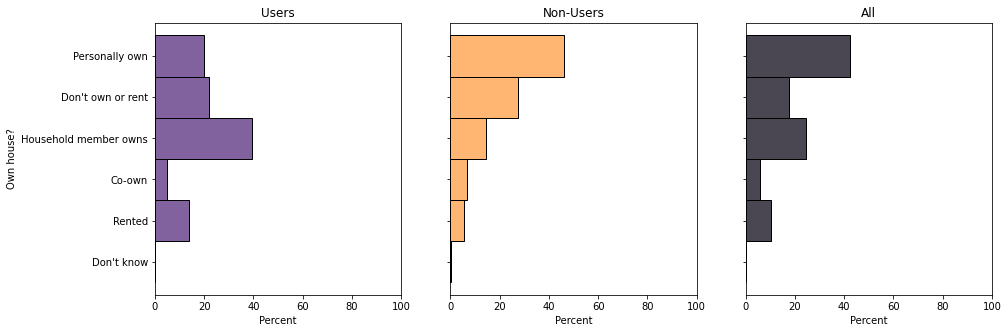

<Figure size 432x288 with 0 Axes>

In [ ]:
#land ownership
fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 3, sharey = True, sharex = True)

sns.histplot(y = users['house_land_ownership'], stat = 'percent', ax = ax[0], color = '#572d7e')
sns.histplot(y = non_users['house_land_ownership'], stat = 'percent', ax = ax[1], color = '#ff9e44')
sns.histplot(y = df['house_land_ownership'], stat = 'percent', ax = ax[2], color = '#0e0918')

ax[0].set_title('Users')
ax[1].set_title('Non-Users')
ax[2].set_title('All')

ax[0].set_ylabel('Own house?')

plt.xlim(0,100)

plt.show()
plt.savefig(f'{images_dir}/5.png')

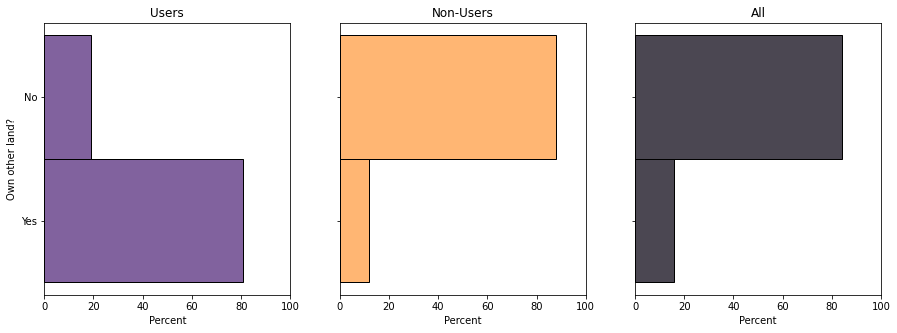

<Figure size 432x288 with 0 Axes>

In [ ]:
#other land ownership
fig, ax = plt.subplots(figsize = (15, 5), nrows = 1, ncols = 3, sharey = True, sharex = True)

sns.histplot(y = users['other_land_ownership'].replace({1:'Yes', 0: 'No'}), stat = 'percent', ax = ax[0], color = '#572d7e')
sns.histplot(y = non_users['other_land_ownership'].replace({1:'Yes', 0: 'No'}), stat = 'percent', ax = ax[1], color = '#ff9e44')
sns.histplot(y = df['other_land_ownership'].replace({1:'Yes', 0: 'No'}), stat = 'percent', ax = ax[2], color = '#0e0918')

ax[0].set_title('Users')
ax[1].set_title('Non-Users')
ax[2].set_title('All')

ax[0].set_ylabel('Own other land?')

plt.xlim(0,100)

plt.show()
plt.savefig(f'{images_dir}/6.png')

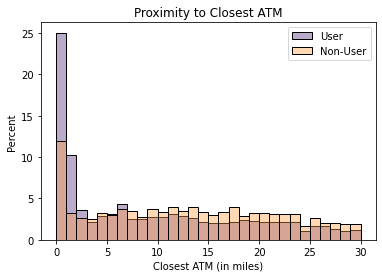

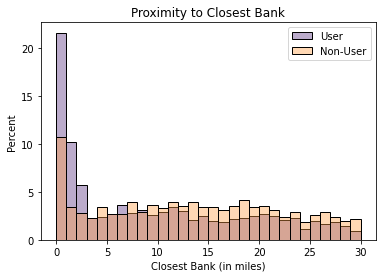

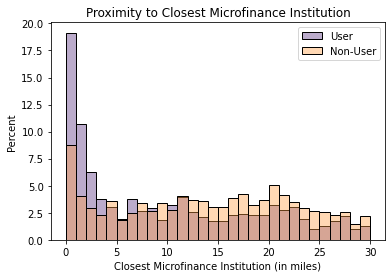

<Figure size 432x288 with 0 Axes>

In [ ]:
#proximitiy to financial access points
def plot_proximity(column, variable_name):
  sns.histplot(x = users[column], stat = 'percent', binwidth = 1, binrange = [0, 30], alpha = 0.4, color = '#572d7e')
  sns.histplot(x = non_users[column], stat = 'percent', binwidth = 1, binrange = [0, 30], alpha = 0.4, color = '#ff9e44')

  plt.legend(labels = ['User', 'Non-User'])
  plt.xlabel(f'Closest {variable_name} (in miles)')
  plt.title(f'Proximity to Closest {variable_name}')
  plt.show()

plot_proximity('closest_atm', 'ATM')
plt.savefig(f'{images_dir}/7.png')

plot_proximity('closest_bank', 'Bank')
plt.savefig(f'{images_dir}/8.png')

plot_proximity('closest_mf', 'Microfinance Institution')
plt.savefig(f'{images_dir}/9.png')

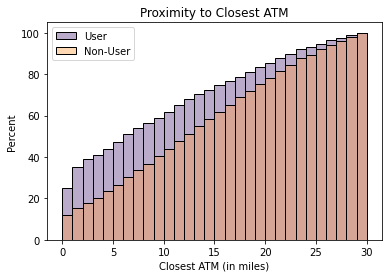

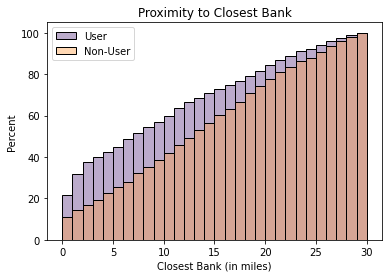

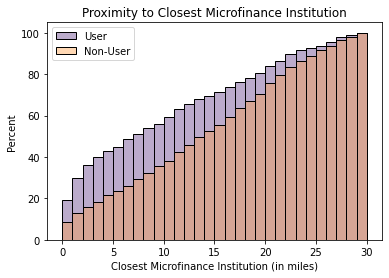

In [ ]:
#proximitiy to financial access points
def plot_proximity_cumulative(column, variable_name):
  sns.histplot(x = users[column], stat = 'percent', binwidth = 1, binrange = [0, 30], alpha = 0.4, color = '#572d7e',
               cumulative = True)
  sns.histplot(x = non_users[column], stat = 'percent', binwidth = 1, binrange = [0, 30], alpha = 0.4, color = '#ff9e44',
               cumulative = True)

  plt.legend(labels = ['User', 'Non-User'])
  plt.xlabel(f'Closest {variable_name} (in miles)')
  plt.title(f'Proximity to Closest {variable_name}')
  plt.show()

plot_proximity_cumulative('closest_atm', 'ATM')
plot_proximity_cumulative('closest_bank', 'Bank')
plot_proximity_cumulative('closest_mf', 'Microfinance Institution')

---


## Pre-Modeling Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('processed_df.csv')

In [ ]:
df.shape

(7094, 30)

In [ ]:
#check how many missing values in each column
df.isna().sum().sort_values(ascending = False)

education                   2
age                         0
no_income                   0
closest_bank                0
closest_atm                 0
income_source               0
target                      0
longitude                   0
latitude                    0
english_literacy            0
kiswahili_literacy          0
service_income_service      0
product_income_product      0
salaried_worker_employer    0
other_source_income         0
others_income               0
gender                      0
welfare_income              0
pension_income              0
interest_income             0
rental_income               0
temp_income                 0
service_income              0
product_income              0
salary_income               0
mobile_ownership            0
other_land_ownership        0
house_land_ownership        0
marital_status              0
closest_mf                  0
dtype: int64

In [ ]:
#drop missing values
df = df.dropna(how = 'any')
df = df.drop('income_source', axis = 1)

In [ ]:
#prepare the dataset
dummy = ['gender', 'marital_status', 'education', 'house_land_ownership',
          'salaried_worker_employer', 'product_income_product', 'service_income_service',
          'kiswahili_literacy', 'english_literacy']

dfm = df.copy(deep = True)
dfm = pd.get_dummies(dfm, columns = dummy)

In [ ]:
X =  dfm.drop(['target', 'latitude', 'longitude'], axis = 1)
y = dfm['target']

In [ ]:
X.columns

Index(['age', 'other_land_ownership', 'mobile_ownership', 'salary_income',
       'product_income', 'service_income', 'temp_income', 'rental_income',
       'interest_income', 'pension_income', 'welfare_income', 'others_income',
       'no_income', 'other_source_income', 'closest_atm', 'closest_bank',
       'closest_mf', 'gender_Female', 'gender_Male', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Never married',
       'marital_status_Widowed', 'education_Completed primary education',
       'education_Don't know', 'education_No formal education',
       'education_Post primary technical training',
       'education_Some primary education',
       'education_Some secondary education',
       'education_University or higher education',
       'house_land_ownership_Co-own', 'house_land_ownership_Don't know',
       'house_land_ownership_Don't own or rent',
       'house_land_ownership_Household member owns',
       'house_land_ownership_Personally own', 'h

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
#scale numerical variables for logistic regression and neural networks
scaler = StandardScaler()

X_train_std = X_train.copy(deep = True)
X_test_std = X_test.copy(deep = True)

X_train_std[['age', 'closest_atm',
             'closest_bank','closest_mf']] = scaler.fit_transform(X_train_std[['age', 'closest_atm', 'closest_bank',
                                                                               'closest_mf']])

X_test_std[['age', 'closest_atm',
        'closest_bank','closest_mf']] = scaler.transform(X_test_std[['age', 'closest_atm', 'closest_bank','closest_mf']])

In [ ]:
X_train_std

,age,other_land_ownership,mobile_ownership,salary_income,product_income,service_income,temp_income,rental_income,interest_income,pension_income,...,kiswahili_literacy_Neither read nor write,kiswahili_literacy_Read and write,kiswahili_literacy_Read only,kiswahili_literacy_Refused to read,kiswahili_literacy_Write only,english_literacy_Neither read nor write,english_literacy_Read and write,english_literacy_Read only,english_literacy_Refused to read,english_literacy_Write only
1458,-0.319429,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5748,-0.928628,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4529,0.167930,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6086,1.020808,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6704,-0.563109,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.716209,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5194,-1.172308,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3982,-0.563109,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
235,-0.502189,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## Modeling

In [ ]:
#set color palette
colors = ['#8870a0', '#d1c8da', '#ff9e44', '#572d7e', '#0e0918', '#ff9e44', '#ff4093', '#5aa5da', '#c06ee2']
customPalette = sns.set_palette(sns.color_palette(colors))

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
def plot_confusion(model, X_test, y_test):
  """ Plots confusion matrix and sklearn classification report given model """

  y_test_pred = model.predict(X_test) #predictions

  colors = ['#d1c8da', '#c8bcd4', '#bfb1cd', '#b6a5c6', '#ad9ac0', '#a58fb9', '#9c84b3',
            '#9379ac', '#8b6ea6', '#82639f', '#795898', '#714d92', '#68438b', '#603885',
            '#572d7e']

  cm = confusion_matrix(y_test, y_test_pred) #confusion matrix
  sns.heatmap(cm, annot=True, xticklabels = [1,0], yticklabels = [1,0], fmt='g',
              cmap = colors) #relabel confusion matrix

  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [ ]:
def add_to_model_df(model, f1, roc, accuracy, precision, recall):
  """ Adds a row to the model evaluation data frame """
  model_df.loc[model] = [f1, roc, accuracy, precision, recall]
  return model_df

In [ ]:
#initialize model evaluation dataframe
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Neural Network']
model_df = pd.DataFrame(index = models, columns = ['F1-Score', 'ROC Area', 'Accuracy', 'Precision', 'Recall'])
model_df

,F1-Score,ROC Area,Accuracy,Precision,Recall
Decision Tree,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN,NaN


### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 802 kB/s 


In [ ]:
def decision_tree(X_train, X_test, y_train, y_test):
  """ Fits a decision tree with the best parameters"""

  parameters = {'max_depth': [3, 4, 5, 6, 7],
                'max_leaf_nodes': [None, 2, 4, 6],
                'min_samples_leaf': [0.1, 0.15, 0.2, 0.25, 0.3]}

  dt = DecisionTreeClassifier(random_state=1)
  clf = GridSearchCV(dt, parameters, scoring='roc_auc', cv=10, return_train_score=True)
  clf.fit(X_train, y_train)

  y_test_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_test_pred)
  roc_area = roc_auc_score(y_test, y_test_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)

  cv_results = pd.DataFrame(clf.cv_results_['params'])
  cv_results['train'] = clf.cv_results_['mean_train_score']
  cv_results['test'] = clf.cv_results_['mean_test_score']

  return clf, f1, roc_area, accuracy, precision, recall

In [ ]:
dt, f1_dt, roc_dt, accuracy_dt, precision_dt, recall_dt = decision_tree(X_train, X_test, y_train, y_test)

In [ ]:
model_df = add_to_model_df('Decision Tree', f1_dt, roc_dt, accuracy_dt, precision_dt, recall_dt)

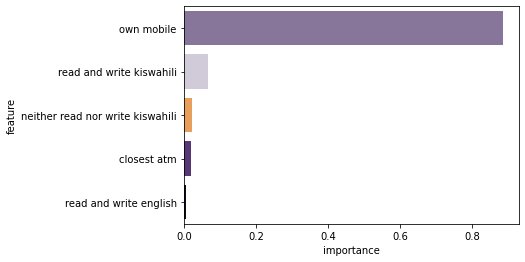

<Figure size 432x288 with 0 Axes>

In [ ]:
importances = dt.best_estimator_.feature_importances_
names = X_train.columns

importances = pd.DataFrame({'feature': names, 'importance': importances}) #create dataframe with features and importances
top_10 = importances.sort_values(by = 'importance', key=abs, ascending = False).iloc[:5,] #get top 5 features

fig, ax = plt.subplots()

sns.barplot(data = top_10, x = 'importance', y = 'feature', color = customPalette, ax = ax)
ax.set_yticklabels(['own mobile', 'read and write kiswahili', 'neither read nor write kiswahili',
            'closest atm', 'read and write english'])
plt.show()
plt.savefig(f'{images_dir}/dt_importances.png')

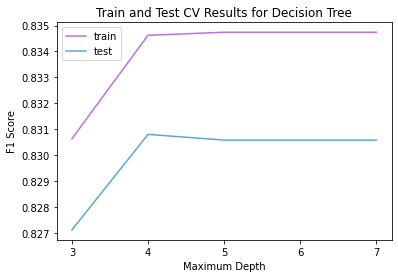

<Figure size 432x288 with 0 Axes>

In [ ]:
#vary max_depth, max_leaf_nodes = None, min_samples_leaf = 0.1
np.set_printoptions(precision=1)

train = dt.cv_results_['mean_train_score'][::20]
test = dt.cv_results_['mean_test_score'][::20]
depths = [3, 4, 5, 6, 7]

fig, ax = plt.subplots()

ax.plot(depths, train, label = 'train', color = '#c06ee2')
ax.plot(depths, test, label = 'test', color = '#5aa5da')
ax.set_xticks(depths)
plt.title('Train and Test CV Results for Decision Tree')
plt.xlabel('Maximum Depth')
plt.ylabel('F1 Score')
plt.legend()

plt.show()
plt.savefig(f'{images_dir}/dt_cv_results.png')

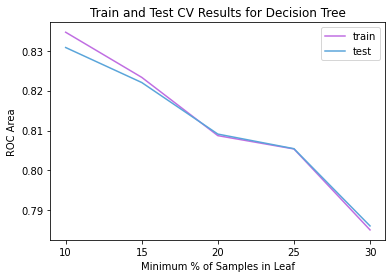

<Figure size 432x288 with 0 Axes>

In [ ]:
#vary min_samples_leaf, max_leaf_nodes = None, max_depth = 4
np.set_printoptions(precision=1)

train = dt.cv_results_['mean_train_score'][20:25]
test = dt.cv_results_['mean_test_score'][20:25]
pct_min_samples_leaf = [10, 15, 20, 25, 30]

fig, ax = plt.subplots()

ax.plot(pct_min_samples_leaf, train, label = 'train', color = '#c06ee2')
ax.plot(pct_min_samples_leaf, test, label = 'test', color = '#5aa5da')
ax.set_xticks(pct_min_samples_leaf)
plt.title('Train and Test CV Results for Decision Tree')
plt.xlabel('Minimum % of Samples in Leaf')
plt.ylabel('ROC Area')
plt.legend()

plt.show()
plt.savefig(f'{images_dir}/dt_cv_results_2.png')

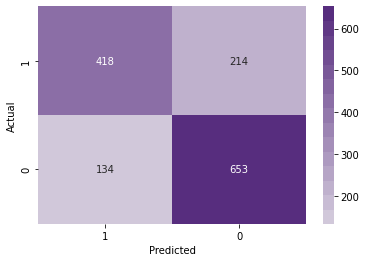

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_confusion(dt.best_estimator_, X_test, y_test)
plt.savefig(f'{images_dir}/dt_cm.png')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


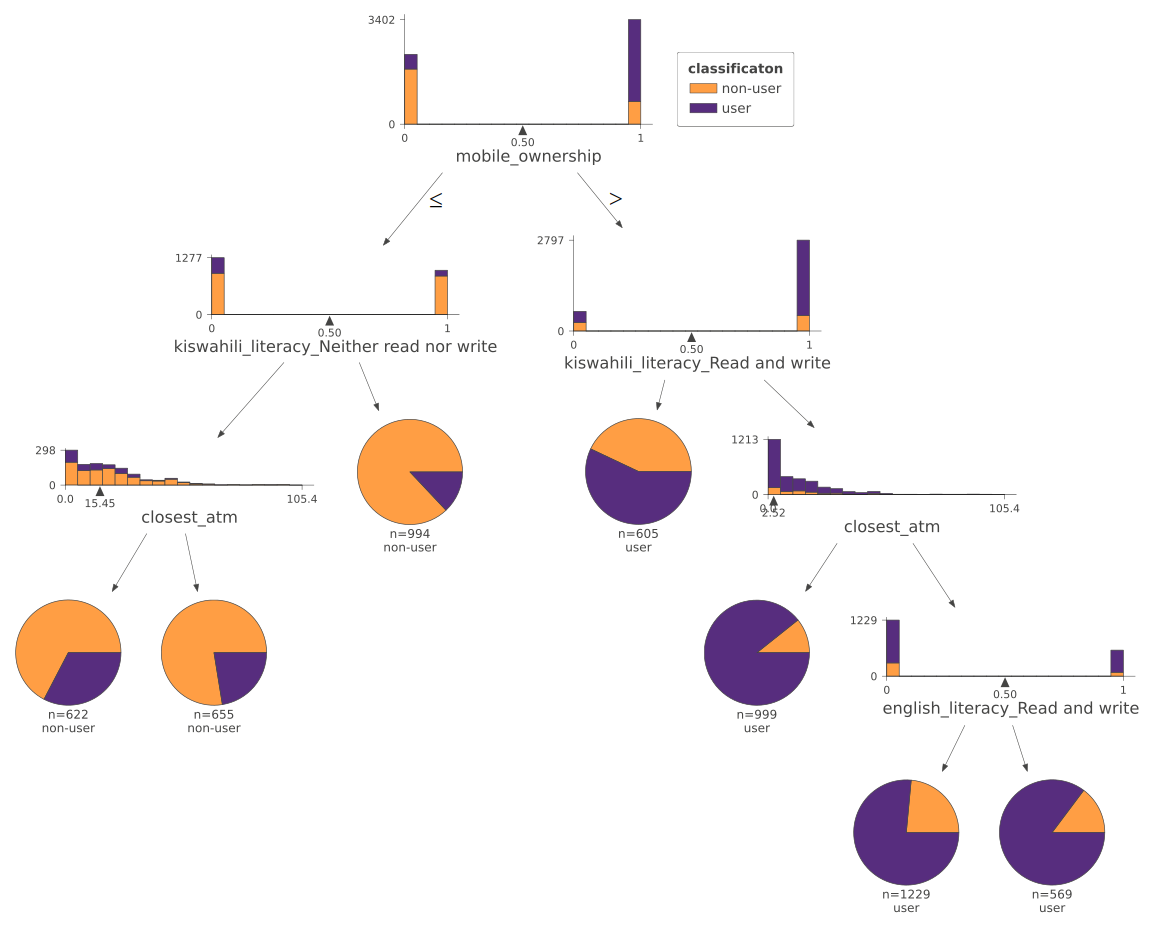

In [ ]:
class_colors = [None,  # 0 classes
                None,  # 1 class
               ['#ff9e44','#572d7e']]

viz = dtreeviz(dt.best_estimator_,
               x_data=X_train,
               y_data=y_train,
               target_name='classificaton',
               feature_names=X_train.columns,
               class_names=['non-user', 'user'],
               scale=1.8,
               colors={'classes': class_colors});

viz.save(f'{images_dir}/dt_visualization.svg')
viz

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def random_forest(X_train, X_test, y_train, y_test):

  parameters = {'max_depth': [3, 4, 5, 6, 7],
                'n_estimators': [100, 200, 300]}

  rf = RandomForestClassifier(random_state=1)
  clf = GridSearchCV(rf, parameters, scoring='roc_auc', cv=10, return_train_score=True)
  clf.fit(X_train, y_train)

  y_test_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_test_pred)
  roc_area = roc_auc_score(y_test, y_test_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)

  cv_results = pd.DataFrame(clf.cv_results_['params'])
  cv_results['train'] = clf.cv_results_['mean_train_score']
  cv_results['test'] = clf.cv_results_['mean_test_score']

  return clf, f1, roc_area, accuracy, precision, recall, cv_results

In [ ]:
# takes over a minite to run
rf, f1_rf, roc_rf, accuracy_rf, precision_rf, recall_rf, cv_rf = random_forest(X_train, X_test, y_train, y_test)

In [ ]:
model_df = add_to_model_df('Random Forest', f1_rf, roc_rf, accuracy_rf, precision_rf, recall_rf)

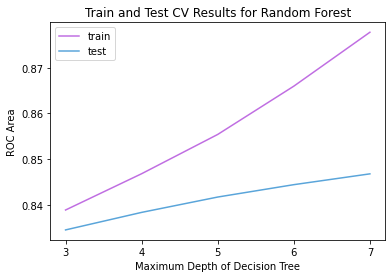

<Figure size 432x288 with 0 Axes>

In [ ]:
#vary max_depth, n_estimators = 300
train = rf.cv_results_['mean_train_score'][2::3]
test = rf.cv_results_['mean_test_score'][2::3]
depths = [3, 4, 5, 6, 7]

fig, ax = plt.subplots()

ax.plot(depths, train, label = 'train', color = '#c06ee2')
ax.plot(depths, test, label = 'test', color = '#5aa5da')
ax.set_xticks(depths)
plt.title('Train and Test CV Results for Random Forest')
plt.xlabel('Maximum Depth of Decision Tree')
plt.ylabel('ROC Area')
plt.legend()

plt.show()
plt.savefig(f'{images_dir}/rf_cv_results.png')

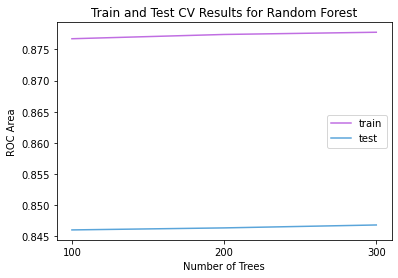

<Figure size 432x288 with 0 Axes>

In [ ]:
#vary n_estimators, max_depth = 7
train = rf.cv_results_['mean_train_score'][12:]
test = rf.cv_results_['mean_test_score'][12:]
n_estimators = [100, 200, 300]

fig, ax = plt.subplots()

ax.plot(n_estimators, train, label = 'train', color = '#c06ee2')
ax.plot(n_estimators, test, label = 'test', color = '#5aa5da')
ax.set_xticks(n_estimators)
plt.title('Train and Test CV Results for Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('ROC Area')
plt.legend()

plt.show()
plt.savefig(f'{images_dir}/rf_cv_results_2.png')

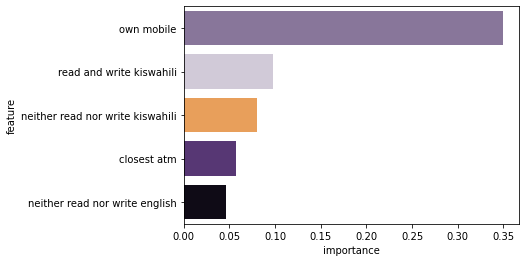

<Figure size 432x288 with 0 Axes>

In [ ]:
importances = rf.best_estimator_.feature_importances_
names = X_train.columns

importances = pd.DataFrame({'feature': names, 'importance': importances}) #create dataframe with features and importances
top_10 = importances.sort_values(by = 'importance', key=abs, ascending = False).iloc[:5,] #get top 5 features

fig, ax = plt.subplots()
sns.barplot(data = top_10, x = 'importance', y = 'feature', color = customPalette, ax = ax)
ax.set_yticklabels(['own mobile', 'read and write kiswahili', 'neither read nor write kiswahili',
                    'closest atm', 'neither read nor write english'])
plt.show()
plt.savefig(f'{images_dir}/rf_importances.png')

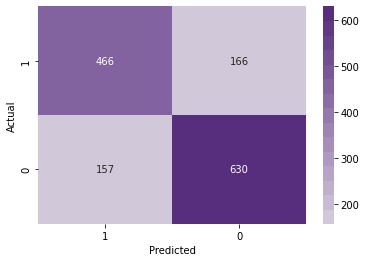

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_confusion(rf.best_estimator_, X_test, y_test)
plt.savefig(f'{images_dir}/rf_cm.png')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def naive_bayes(X_train, X_test, y_train, y_test):
  X_train = X_train.drop(['age', 'closest_atm', 'closest_bank', 'closest_mf'], axis = 1)
  X_test = X_test.drop(['age', 'closest_atm', 'closest_bank', 'closest_mf'], axis = 1)

  nb = MultinomialNB()
  nb.fit(X_train, y_train)

  y_test_pred = nb.predict(X_test)

  f1 = f1_score(y_test, y_test_pred)
  roc_area = roc_auc_score(y_test, y_test_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)

  return nb, f1, roc_area, accuracy, precision, recall

In [ ]:
nb, f1_nb, roc_nb, accuracy_nb, precision_nb, recall_nb = naive_bayes(X_train, X_test, y_train, y_test)

In [ ]:
model_df = add_to_model_df('Naive Bayes', f1_nb, roc_nb, accuracy_nb, precision_nb, recall_nb)

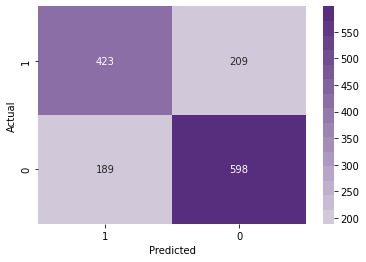

<Figure size 432x288 with 0 Axes>

In [ ]:
X_test_nb = X_test.drop(['age', 'closest_atm', 'closest_bank', 'closest_mf'], axis = 1)
plot_confusion(nb, X_test_nb, y_test)
plt.savefig(f'{images_dir}/nb_cm.png')

In [ ]:
#priors
prob_user = y_train.value_counts()[0]/len(y_train)
prob_nonuser = y_train.value_counts()[1]/len(y_train)

features = X_test_nb.columns

nb_df = pd.DataFrame(index = features)
nb_df['P(user)'] = np.e ** (nb.feature_log_prob_[0, :])
nb_df['P(nonuser)'] = np.e ** (nb.feature_log_prob_[1, :])
nb_df['odds_user'] = (nb.feature_log_prob_[0, :]) / (nb.feature_log_prob_[1, :]) * (prob_user / prob_nonuser)
nb_df['odds_nonuser'] = (nb.feature_log_prob_[1, :]) / (nb.feature_log_prob_[0, :]) * (prob_nonuser / prob_user)

In [ ]:
#top 5 important features to predict user
nb_df.sort_values(by = 'odds_user', key = abs, ascending = False)[['odds_user']][:5]

,odds_user
education_Don't know,1.175280
salaried_worker_employer_Government,1.143221
salaried_worker_employer_Private company/business,1.125035
mobile_ownership,1.117186
salary_income,1.101124


In [ ]:
#top 5 important features to predict non user
nb_df.sort_values(by = 'odds_nonuser', key = abs, ascending = False)[['odds_nonuser']][:5]

,odds_nonuser
kiswahili_literacy_Neither read nor write,1.742626
education_No formal education,1.712166
welfare_income,1.532286
education_Some primary education,1.491402
english_literacy_Neither read nor write,1.461830


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

In [ ]:
def tune_logistic_regression(X_train, y_train):
  """ Tunes the regularization parameter using cross-validation """

  lambdas = range(1, 31)
  parameters = {'C': [1/l for l in lambdas]}

  lr = LogisticRegression(random_state=1)
  clf = GridSearchCV(lr, parameters, scoring='roc_auc', cv=10, return_train_score=True)
  clf.fit(X_train, y_train)

  train = clf.cv_results_['mean_train_score']
  test = clf.cv_results_['mean_test_score']
  best_lambda = 1/clf.best_params_['C']
  best_score = clf.best_score_

  fig, ax = plt.subplots()
  ax.plot(lambdas, train, label = 'train', color = '#c06ee2')
  ax.plot(lambdas, test, label = 'test', color = '#5aa5da')
  ax.plot(best_lambda, best_score, 'x', color = 'black')
  plt.legend()
  plt.title('Train and Test CV Results for Logistic Regression')
  plt.xlabel('Lambda')
  plt.ylabel('ROC Score')
  plt.savefig(f'{images_dir}/lr_cv_results.png')
  plt.show()

  return clf

In [ ]:
def optimize_threshold_lr(c, X_train, X_test, y_train, y_test):
  """ Plots ROC curve of logistic regression model and finds the threshold at which the difference
      between the true positive rate and false positive rate is the highest """

  #split into 10 folds
  kf = KFold(n_splits=10, random_state=1, shuffle=True)

  #list to hold all optimum threholds
  all_optimum_thresholds = []

  i = 0 #counter to check if we are on our last split in cross-validation below
  for train_index, val_index in kf.split(X_train):
    #split into train and validate
    X_t, X_v = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
    y_t, y_v = y_train.iloc[train_index], y_train.iloc[val_index]

    #train and fit model
    lr = LogisticRegression(C = c, random_state=1)
    lr.fit(X_t, y_t)

    y_pred_prob = lr.predict_proba(X_v)
    y_pred_prob_true = y_pred_prob[:,1]

    #find optimal threhold for this split
    fpr, tpr, thresholds = roc_curve(y_v, y_pred_prob_true)
    optimal_idx = np.argmax(tpr - fpr)
    all_optimum_thresholds.append(thresholds[optimal_idx])

    i += 1

    #if last split, visualize the ROC curve, tpr and fpr curve
    if i == 9:
      RocCurveDisplay.from_estimator(lr, X_v, y_v)
      plt.savefig(f'{images_dir}/lr_roc.png')

      plt.title('ROC Curve')
      plt.xlabel('FPR')
      plt.ylabel('TPR')
      plt.show()

      optimal_threshold = np.mean(all_optimum_thresholds)

      plt.plot(thresholds, fpr, label = 'False Positive Rate', color = '#ff4093')
      plt.plot(thresholds, tpr, label = 'True Positive Rate', color = '#c06ee2')
      plt.axvline(optimal_threshold, linestyle = '--', color = 'black')
      plt.xlim(0, 1.0)

      plt.xlabel('Threshold')
      plt.ylabel('Rate')
      plt.legend()
      plt.show()
      plt.savefig(f'{images_dir}/lr_fpr_tpr.png')

      print(f'Optimal Threshold: {optimal_threshold:.2f}')

  return optimal_threshold

In [ ]:
def logistic_regression(X_train, X_test, y_train, y_test):
  #tune parameters
  clf = tune_logistic_regression(X_train, y_train)
  penalty = clf.best_params_['C']

  #find optimal threshold
  optimal_threshold = optimize_threshold_lr(penalty, X_train, X_test, y_train, y_test)

  #retrieve model
  lr = clf.best_estimator_

  #predict using optimal threshold
  y_test_prob = lr.predict_proba(X_test)

  y_test_pred = [1 if x >= optimal_threshold else 0 for x in y_test_prob[:,1]]

  f1 = f1_score(y_test, y_test_pred)
  roc_area = roc_auc_score(y_test, y_test_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)

  return lr, f1, roc_area, accuracy, precision, recall

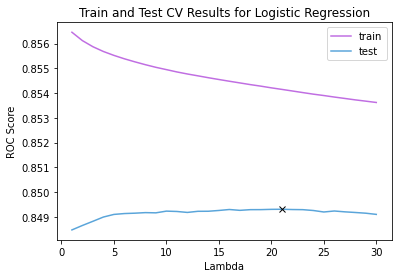

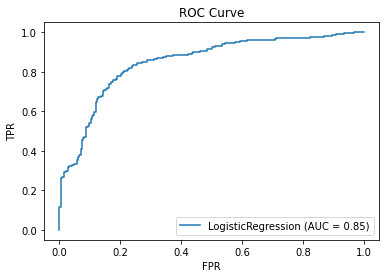

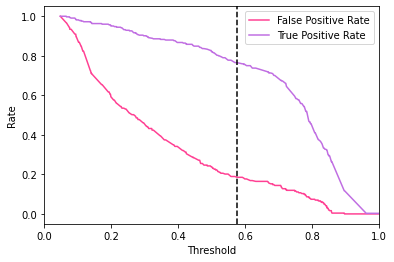

Optimal Threshold: 0.58


<Figure size 432x288 with 0 Axes>

In [ ]:
lr, f1_lr, roc_lr, accuracy_lr, precision_lr, recall_lr = logistic_regression(X_train_std, X_test_std, y_train, y_test)

In [ ]:
model_df = add_to_model_df('Logistic Regression', f1_lr, roc_lr, accuracy_lr, precision_lr, recall_lr)

In [ ]:
values = lr.coef_[0]
coefficients = X_train.columns

coef_df = pd.DataFrame({'feature': coefficients, 'odds': np.exp(values)})
coef_df = coef_df.set_index('feature')
coef_df.sort_values(by = 'odds', key=abs, ascending = False).iloc[:5, :] #top 5 coefficients

,odds
feature,
mobile_ownership,7.295617
others_income,1.498721
house_land_ownership_Rented,1.414182
education_Don't know,1.377952
english_literacy_Read and write,1.316117


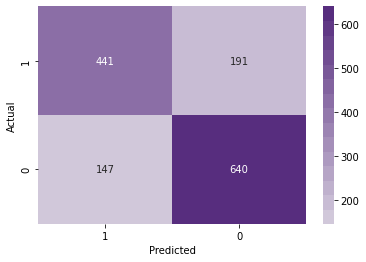

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_confusion(lr, X_test_std, y_test)
plt.savefig(f'{images_dir}/lr_cm.png')

#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
!pip install -U dmba;
from dmba import regressionSummary
from IPython.core.pylabtools import figsize
from itertools import cycle

In [ ]:
def tune_neural_net(X_train, y_train):
  parameters = {'hidden_layer_sizes':[(50, 50), (75, 75), (100, 100), (125,125), (150, 150), (175, 175), (200, 200)],
                'alpha': [0.0001, 0.001, 0.005]}

  nn = MLPClassifier(random_state=1, solver = 'adam', activation = 'logistic',
                     early_stopping = True, validation_fraction = 0.2, max_iter = 500)
  clf = GridSearchCV(nn, parameters, scoring='roc_auc', cv=10, return_train_score=True)
  clf.fit(X_train.values, y_train)

  cv_results = pd.DataFrame(clf.cv_results_['params'])
  cv_results['train'] = clf.cv_results_['mean_train_score']
  cv_results['test'] = clf.cv_results_['mean_test_score']

  return clf, cv_results

In [ ]:
def optimize_threshold_nn(X_train, y_train, params):
  """ Plots ROC curve of logistic regression model and finds the threshold at which the difference
      between the true positive rate and false positive rate is the highest """

  #split into 10 folds
  kf = KFold(n_splits=10, random_state=1, shuffle=True)

  #list to hold all optimum threholds
  all_optimum_thresholds = []

  i = 0 #counter to check if we are on our last split in cross-validation below
  for train_index, val_index in kf.split(X_train):
    #split into train and validate
    X_t, X_v = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
    y_t, y_v = y_train.iloc[train_index], y_train.iloc[val_index]

    #train and fit model
    nn = MLPClassifier(random_state=1, solver = 'adam', max_iter = 500,
                       early_stopping = True, validation_fraction = 0.2,
                       hidden_layer_sizes = params['hidden_layer_sizes'],
                       activation = 'logistic', alpha = params['alpha'])
    nn.fit(X_t, y_t)

    y_pred_prob = nn.predict_proba(X_v)
    y_pred_prob_true = y_pred_prob[:,1]

    #find optimal threhold for this split
    fpr, tpr, thresholds = roc_curve(y_v, y_pred_prob_true)
    optimal_idx = np.argmax(tpr - fpr)
    all_optimum_thresholds.append(thresholds[optimal_idx])

    i += 1

    #if last split, visualize the ROC curve, tpr and fpr curve
    if i == 9:
      RocCurveDisplay.from_estimator(nn, X_v, y_v)
      plt.title('ROC Curve')
      plt.xlabel('FPR')
      plt.ylabel('TPR')
      plt.savefig(f'{images_dir}/nn_roc.png')
      plt.show()

      optimal_threshold = np.mean(all_optimum_thresholds)

      plt.plot(thresholds, fpr, label = 'False Positive Rate', color = '#ff4093')
      plt.plot(thresholds, tpr, label = 'True Positive Rate', color = '#c06ee2')
      plt.axvline(optimal_threshold, linestyle = '--', color = 'black')
      plt.xlim(0, 1.0)

      plt.xlabel('Threshold')
      plt.ylabel('Rate')
      plt.legend()
      plt.savefig(f'{images_dir}/nn_fpr_tpr.png')
      plt.show()


      print(f'Optimal Threshold: {optimal_threshold:.2f}')

  return optimal_threshold

In [ ]:
def neural_net(X_train, X_test, y_train, y_test):

  #tune neural net
  clf, cv_results = tune_neural_net(X_train, y_train)
  best_parameters = clf.best_params_

  #optimize threshold
  optimal_threshold = optimize_threshold_nn(X_train, y_train, best_parameters)

  #retrieve model
  nn = clf.best_estimator_

  #predict using optimal threshold
  y_test_prob = nn.predict_proba(X_test)

  y_test_pred = [1 if x >= optimal_threshold else 0 for x in y_test_prob[:,1]]

  f1 = f1_score(y_test, y_test_pred)
  roc_area = roc_auc_score(y_test, y_test_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)

  return nn, f1, roc_area, accuracy, precision, recall, cv_results

Optimal Threshold: 0.57


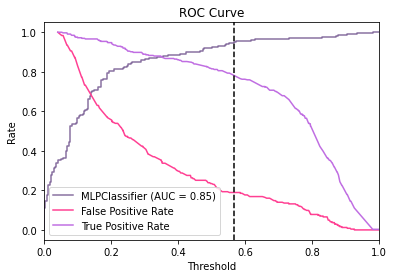

In [ ]:
# takes roughly 30 minutes to run
nn, f1_nn, roc_nn, accuracy_nn, precision_nn, recall_nn, cv_results_nn = neural_net(X_train_std, X_test_std, y_train, y_test)

In [ ]:
model_df = add_to_model_df('Neural Network', f1_nn, roc_nn, accuracy_nn, precision_nn, recall_nn)

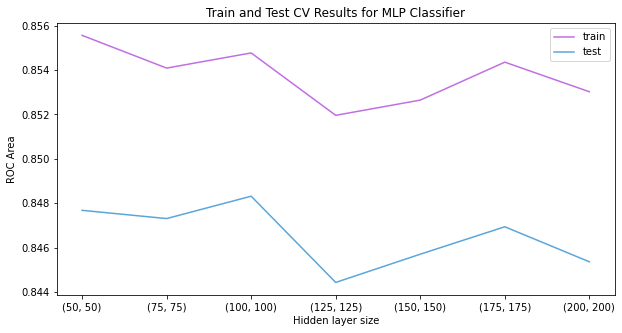

In [ ]:
#vary hidden layer sizes, alpha = 0.005
nn_train = cv_results_nn['train'][2::3]
nn_test = cv_results_nn['test'][2::3]
layers = ['(50, 50)', '(75, 75)', '(100, 100)', '(125, 125)', '(150, 150)', '(175, 175)', '(200, 200)']

fig, ax = plt.subplots(figsize = (10,5))

ax.plot(layers, nn_train, label = 'train', color = '#c06ee2')
ax.plot(layers, nn_test, label = 'test', color = '#5aa5da')
ax.set_xticks(layers)
plt.title('Train and Test CV Results for MLP Classifier')
plt.xlabel('Hidden layer size')
plt.ylabel('ROC Area')
plt.legend()

plt.show()
plt.savefig(f'{images_dir}/nn_cv_results.png')

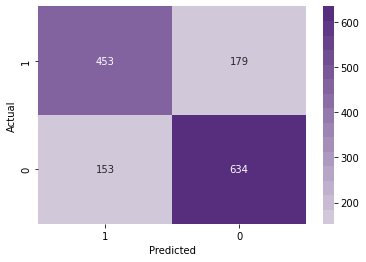

In [ ]:
plot_confusion(nn, X_test_std, y_test)
plt.savefig(f'{images_dir}/nn_cm.png')

In [ ]:
model_df.to_csv('model_eval.csv', index = True)

# Effects of Hyper Tuning

In [ ]:
#Decision Tree
dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(X_train, y_train)
y_test_pred_dt1 = dt1.predict(X_test)

roc_dt1 = roc_auc_score(y_test, y_test_pred_dt1)

In [ ]:
#Random Forest
rf1 = RandomForestClassifier(random_state=1)
rf1.fit(X_train, y_train)
y_test_pred_rf1 = rf1.predict(X_test)

roc_rf1 = roc_auc_score(y_test, y_test_pred_rf1)

In [ ]:
#Logistic Regression
lr1 = LogisticRegression(random_state=1)
lr1.fit(X_train_std, y_train)
y_test_pred_lr1 = lr1.predict(X_test_std)

roc_lr1 = roc_auc_score(y_test, y_test_pred_lr1)

In [ ]:
#MLP Classifier
nn1 = MLPClassifier(random_state = 1)
nn1.fit(X_train_std, y_train)
y_test_pred_nn1 = nn1.predict(X_test_std)

roc_nn1 = roc_auc_score(y_test, y_test_pred_nn1)

In [ ]:
#compiling it together
ht = {'Decision Tree': [roc_dt1, roc_dt],
              'Random Forest': [roc_rf1, roc_rf],
              'Logistic Regression': [roc_lr1, roc_lr],
              'Neural Networks': [roc_nn1, roc_nn]}

ht_effect = pd.DataFrame.from_dict(ht, orient = 'index')
ht_effect.columns = ['Untuned ROC', 'Tuned ROC']
ht_effect['% Change'] = ((ht_effect['Tuned ROC'] - ht_effect['Untuned ROC'])/ht_effect['Untuned ROC']*100)
ht_effect = ht_effect.round(decimals=3)
ht_effect

,Untuned ROC,Tuned ROC,% Change
Decision Tree,0.678,0.746,9.924
Random Forest,0.770,0.769,-0.103
Logistic Regression,0.756,0.766,1.291
Neural Networks,0.743,0.767,3.289




---

## Model Evaluation

In [ ]:
model_df = pd.read_csv('model_eval.csv')

In [ ]:
model_df

,F1-Score,ROC Area,Accuracy,Precision,Recall
Decision Tree,0.789601,0.745563,0.754757,0.753172,0.829733
Random Forest,0.795957,0.768925,0.772375,0.791457,0.800508
Naive Bayes,0.750314,0.714576,0.719521,0.741016,0.759848
Logistic Regression,0.788732,0.765568,0.767442,0.794839,0.782719
Neural Network,0.791054,0.767474,0.769556,0.79563,0.786531


In [ ]:
def plot_model_score(score):
  np.set_printoptions(precision = 1)
  fig, ax = plt.subplots(figsize = (8, 5))

  ax = sns.barplot(model_df.sort_values(by = 'F1-Score', ascending = False).index,
              model_df.sort_values(by = 'F1-Score', ascending = False)[score],
              color = customPalette)

  #ax.bar_label(ax.containers[0])

  plt.ylim(0, 1)
  plt.xticks(rotation = 90)
  plt.title(col)
  plt.show()

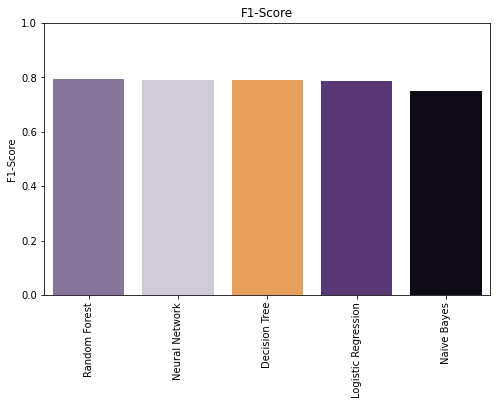

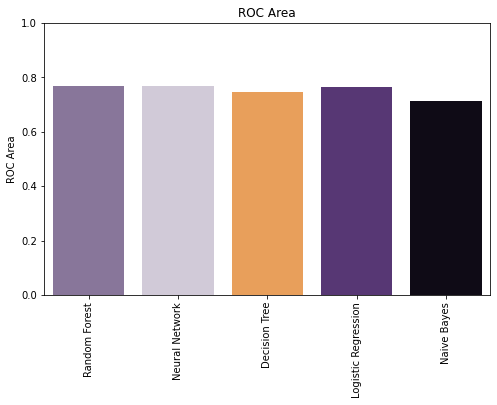

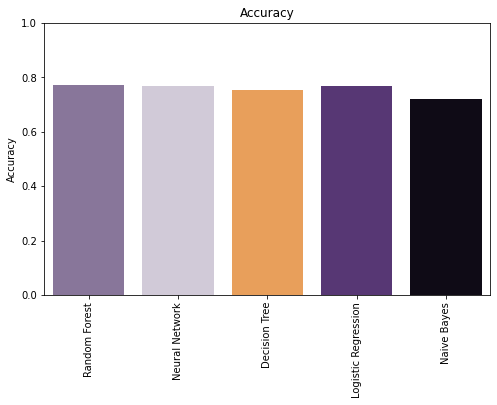

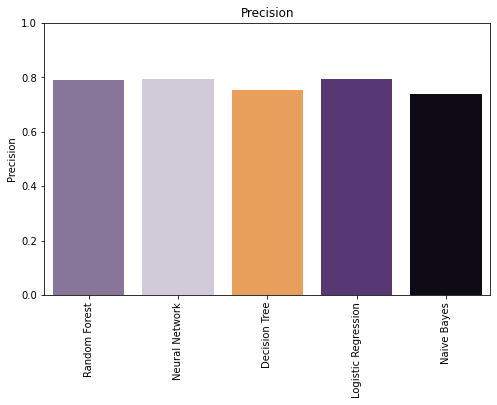

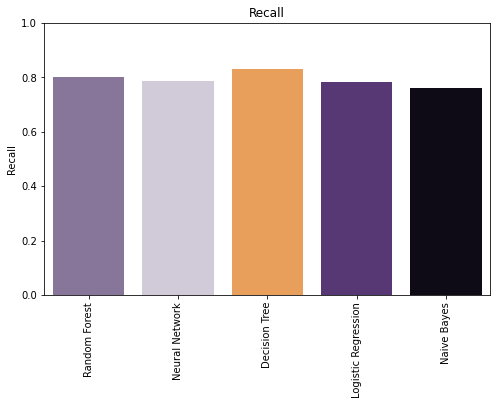

In [ ]:
for col in model_df.columns:
  plot_model_score(col)